In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
path = 'assets/D3.csv'
df = pd.read_csv(path)

# Separate features (X) and target variable (y)
X = df[['X1', 'X2', 'X3']].values
y = df['Y'].values


In [3]:
df.head

<bound method NDFrame.head of           X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]>

In [4]:
def compute_loss(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

In [5]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        
        # Compute gradients
        gradients = (1/m) * np.dot(X.T, (predictions - y)) #multipy transpose(X) with 
        
        # Update parameters
        theta -= learning_rate * gradients
        
        # Compute cost and store it
        cost = compute_loss(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [7]:
learning_rate = .1
num_iterations = 1000

# Train on X1
X1 = X[:, 0].reshape(-1, 1)
X1_b = np.c_[np.ones((len(X1), 1)), X1]
theta1 = np.zeros(2)
theta1, _ = gradient_descent(X1_b, y, theta1, learning_rate, num_iterations)

# Train on X2
X2 = X[:, 1].reshape(-1, 1)
X2_b = np.c_[np.ones((len(X2), 1)), X2]
theta2 = np.zeros(2)
theta2, _ = gradient_descent(X2_b, y, theta2, learning_rate, num_iterations)

# Train on X3
X3 = X[:, 2].reshape(-1, 1)
X3_b = np.c_[np.ones((len(X3), 1)), X3]
theta3 = np.zeros(2)
theta3, _ = gradient_descent(X3_b, y, theta3, learning_rate, num_iterations)

# Combine thetas
theta_combined = np.array([theta1[0], theta1[1], theta2[1], theta3[1]])

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = np.dot(new_X_b, theta_combined)
print("Predictions:", predictions)

Predictions: [ 3.92673701 -0.23065589  0.40767135]


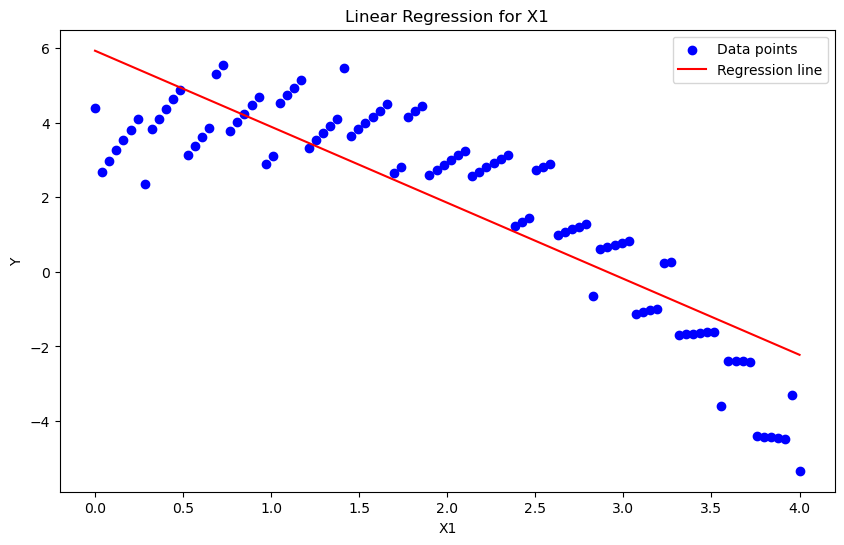

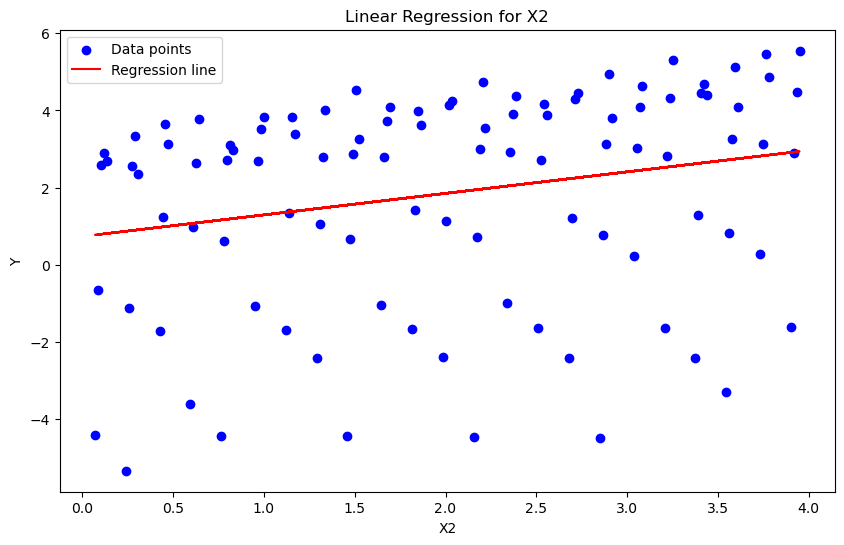

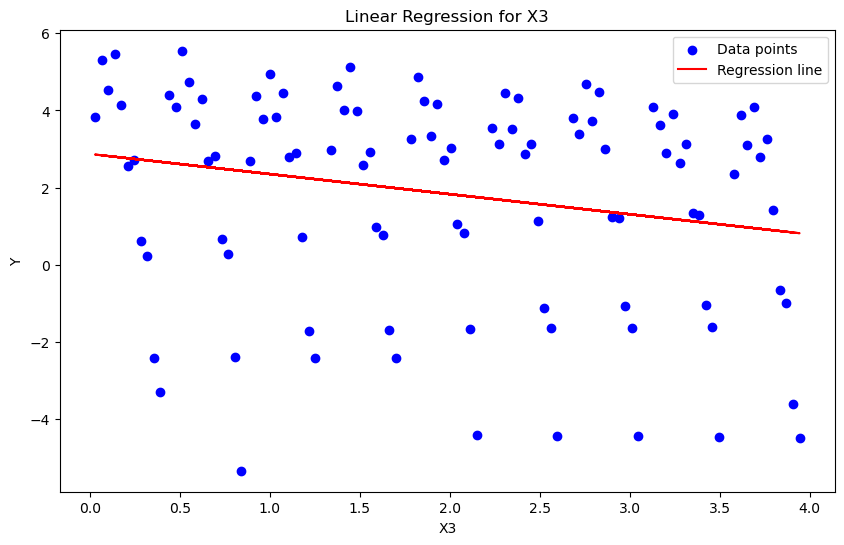

X1 equation: Y = 5.9279 + -2.0383X1
X2 equation: Y = 0.7361 + 0.5576X2
X3 equation: Y = 2.8714 + -0.5205X3
Combined equation: Y = 5.9279 + -2.0383X1 + 0.5576X2 + -0.5205X3


In [8]:
import matplotlib.pyplot as plt

# Function to plot single feature regression
def plot_single_feature(X, y, theta, feature_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, np.dot(np.c_[np.ones((len(X), 1)), X], theta), color='red', label='Regression line')
    plt.xlabel(feature_name)
    plt.ylabel('Y')
    plt.legend()
    plt.title(f'Linear Regression for {feature_name}')
    plt.show()

# Plot for X1
plot_single_feature(X1, y, theta1, 'X1')

# Plot for X2
plot_single_feature(X2, y, theta2, 'X2')

# Plot for X3
plot_single_feature(X3, y, theta3, 'X3')

# Print the equations
print(f"X1 equation: Y = {theta1[0]:.4f} + {theta1[1]:.4f}X1")
print(f"X2 equation: Y = {theta2[0]:.4f} + {theta2[1]:.4f}X2")
print(f"X3 equation: Y = {theta3[0]:.4f} + {theta3[1]:.4f}X3")
print(f"Combined equation: Y = {theta_combined[0]:.4f} + {theta_combined[1]:.4f}X1 + {theta_combined[2]:.4f}X2 + {theta_combined[3]:.4f}X3")

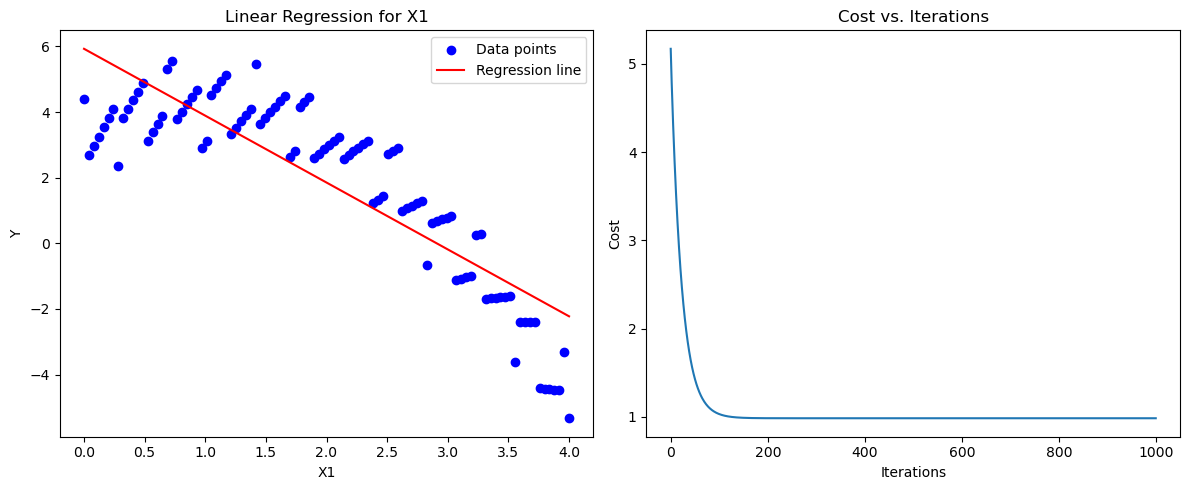

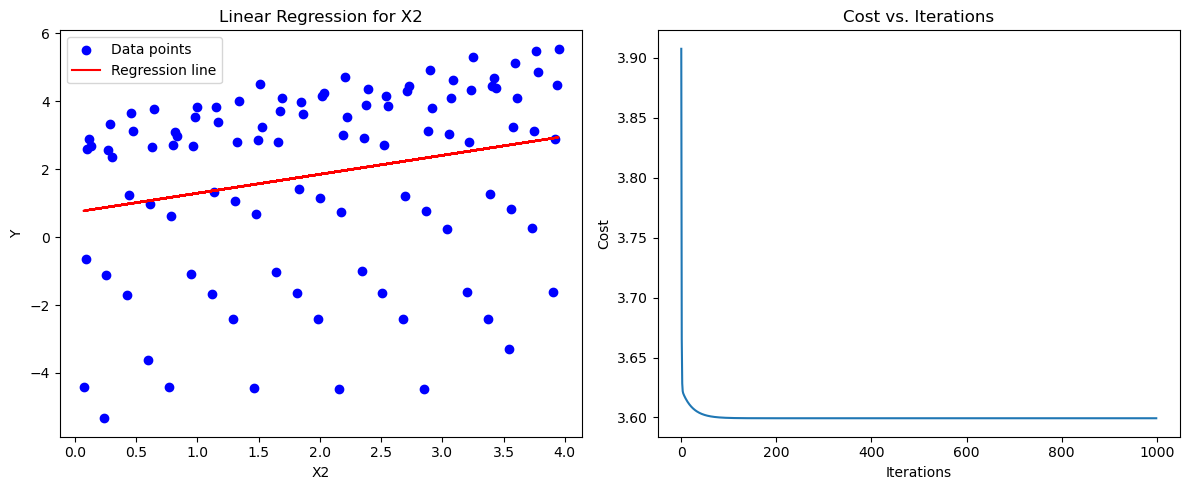

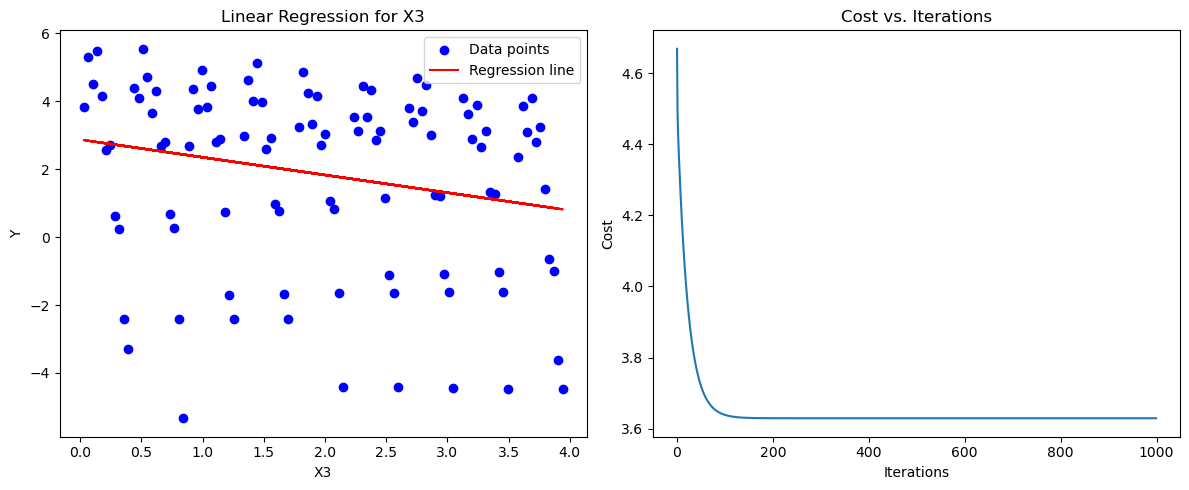

Predictions: [ 3.92673701 -0.23065589  0.40767135]

Linear Models:
X1: Y = 5.9279 + -2.0383 * X1
X2: Y = 0.7361 + 0.5576 * X2
X3: Y = 2.8714 + -0.5205 * X3

The explanatory variable with the lowest loss is: X1

Impact of Learning Rate:
With a learning rate of 0.1 and 1000 iterations:
X1: Final loss = 0.9850
X2: Final loss = 3.5994
X3: Final loss = 3.6295
A higher learning rate generally leads to faster convergence but risks overshooting the minimum.
A lower learning rate provides more precise results but may require more iterations to converge.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("assets/D3.csv")
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values

def hypothesis(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (learning_rate / m) * np.dot(X.T, (predictions - y))
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

def plot_results(X, y, theta, cost_history, variable_name):
    plt.figure(figsize=(12, 5))
    
    # Plot the regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], y, color='b', label='Data points')
    plt.plot(X[:, 1], hypothesis(X, theta), color='r', label='Regression line')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.title(f'Linear Regression for {variable_name}')
    plt.legend()
    
    # Plot the cost history
    plt.subplot(1, 2, 2)
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iterations')
    
    plt.tight_layout()
    plt.show()

learning_rate = 0.1
num_iterations = 1000

# Train on X1
X1 = X[:, 0].reshape(-1, 1)
X1_b = np.c_[np.ones((len(X1), 1)), X1]
theta1 = np.zeros(2)
theta1, cost_history1 = gradient_descent(X1_b, y, theta1, learning_rate, num_iterations)
plot_results(X1_b, y, theta1, cost_history1, 'X1')

# Train on X2
X2 = X[:, 1].reshape(-1, 1)
X2_b = np.c_[np.ones((len(X2), 1)), X2]
theta2 = np.zeros(2)
theta2, cost_history2 = gradient_descent(X2_b, y, theta2, learning_rate, num_iterations)
plot_results(X2_b, y, theta2, cost_history2, 'X2')

# Train on X3
X3 = X[:, 2].reshape(-1, 1)
X3_b = np.c_[np.ones((len(X3), 1)), X3]
theta3 = np.zeros(2)
theta3, cost_history3 = gradient_descent(X3_b, y, theta3, learning_rate, num_iterations)
plot_results(X3_b, y, theta3, cost_history3, 'X3')

# Combine thetas
theta_combined = np.array([theta1[0], theta1[1], theta2[1], theta3[1]])

# Function for predictions
def predictions(X, theta):
    return np.dot(X, theta)

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = predictions(new_X_b, theta_combined)
print("Predictions:", predictions)

# Report the linear models
print("\nLinear Models:")
print(f"X1: Y = {theta1[0]:.4f} + {theta1[1]:.4f} * X1")
print(f"X2: Y = {theta2[0]:.4f} + {theta2[1]:.4f} * X2")
print(f"X3: Y = {theta3[0]:.4f} + {theta3[1]:.4f} * X3")

# Find the variable with the lowest loss
final_costs = [cost_history1[-1], cost_history2[-1], cost_history3[-1]]
best_var_index = np.argmin(final_costs)
best_var = ['X1', 'X2', 'X3'][best_var_index]
print(f"\nThe explanatory variable with the lowest loss is: {best_var}")

# Describe the impact of learning rate
print("\nImpact of Learning Rate:")
print(f"With a learning rate of {learning_rate} and {num_iterations} iterations:")
for i, var in enumerate(['X1', 'X2', 'X3']):
    print(f"{var}: Final loss = {final_costs[i]:.4f}")
print("A higher learning rate generally leads to faster convergence but risks overshooting the minimum.")
print("A lower learning rate provides more precise results but may require more iterations to converge.")